# Import data

In [28]:
from keras.datasets import mnist

In [29]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [30]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


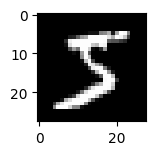

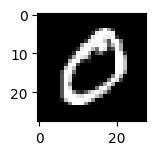

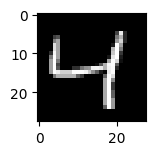

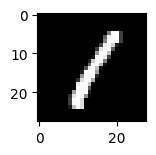

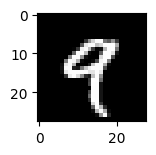

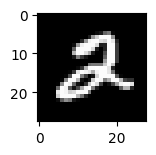

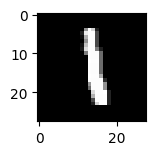

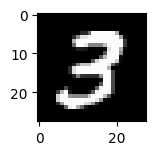

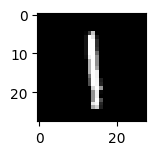

In [31]:
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [32]:
len(train_y)

60000

# Procesar la data

Normalizamos las imagenes

In [33]:
import numpy as np

train_images_array = train_X / 255
test_images_array = test_X / 255
train_images_array

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [34]:
train_images_array.shape

(60000, 28, 28)

pasamos los label a one hot encoder

In [35]:
from keras.utils import to_categorical

train_y = to_categorical(train_y, num_classes=10)
test_y = to_categorical(test_y, num_classes=10)

In [36]:
train_y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Separamos el train en train y validation

In [37]:
from sklearn.model_selection import train_test_split

X_train_new, X_val, y_train_new, y_val = train_test_split(train_images_array, train_y, test_size=0.2, random_state=42)

# Model

In [45]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [46]:
history = model.fit(X_train_new, y_train_new,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3919 - accuracy: 0.8899 - val_loss: 0.1945 - val_accuracy: 0.9463
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1628 - accuracy: 0.9527 - val_loss: 0.1471 - val_accuracy: 0.9566
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1190 - accuracy: 0.9650 - val_loss: 0.1214 - val_accuracy: 0.9650
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0916 - accuracy: 0.9729 - val_loss: 0.1052 - val_accuracy: 0.9678
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0730 - accuracy: 0.9785 - val_loss: 0.0909 - val_accuracy: 0.9725
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0602 - accuracy: 0.9820 - val_loss: 0.0919 - val_accuracy: 0.9720
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0492 - accuracy: 0.9853 - val_loss: 0.0884 - val_accuracy: 0.9743
Epoch 

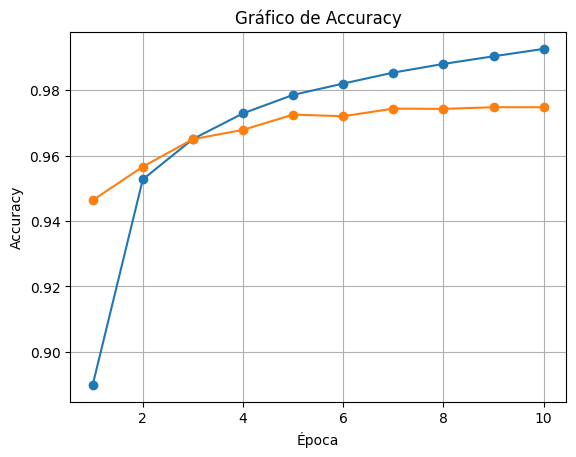

In [47]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# Número de épocas o iteraciones
epochs = len(train_accuracy)

# Crear una lista con los números de épocas
x = range(1, epochs + 1)

# Graficar el accuracy
plt.plot(x, train_accuracy, marker='o')
plt.plot(x, val_accuracy, marker='o')

# Etiquetas de los ejes
plt.xlabel('Época')
plt.ylabel('Accuracy')

# Título del gráfico
plt.title('Gráfico de Accuracy')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

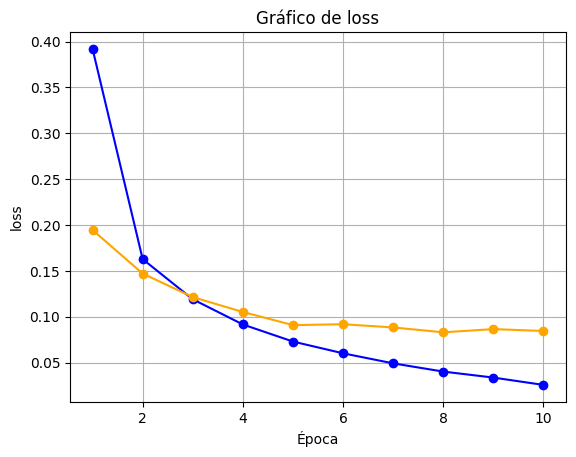

In [48]:
loss = history.history['loss']
loss_val = history.history['val_loss']
# Número de épocas o iteraciones
epochs = len(loss)

# Crear una lista con los números de épocas
x = range(1, epochs + 1)

# Graficar el accuracy
plt.plot(x, loss, marker='o', color='blue')
plt.plot(x, loss_val, marker='o', color='orange')

# Etiquetas de los ejes
plt.xlabel('Época')
plt.ylabel('loss')

# Título del gráfico
plt.title('Gráfico de loss')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Probar modelo

In [51]:
predictions = model.predict(test_images_array)

313/313 [==============================] - 1s 2ms/step


In [93]:
import matplotlib.pyplot as plt

def showResults(test_X, predictions):
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))  # Aumenta el tamaño si es necesario

    # Mostrar la imagen en el primer subplot
    axs[0].imshow(test_X, cmap='gray')
    axs[0].set_title('Imagen de test')

    # Mostrar las predicciones en el segundo subplot como gráfico de barras
    axs[1].bar(range(10), predictions)
    axs[1].set_title('Predicciones')
    axs[1].set_xlabel('Clase')
    axs[1].set_ylabel('Probabilidad')
    axs[1].set_xticks(range(10))  # Ajusta los ticks del eje x

    # Ajustar el espaciado entre los subplots
    plt.tight_layout()

    # Mostrar los gráficos
    plt.show()


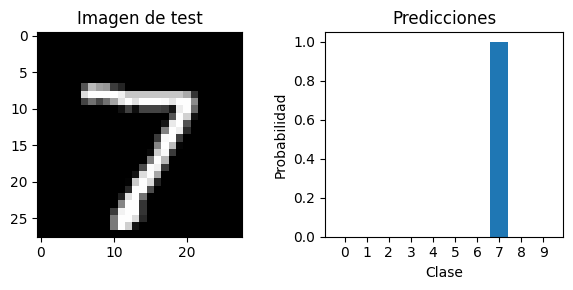

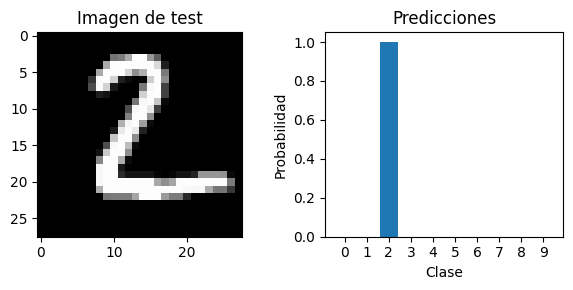

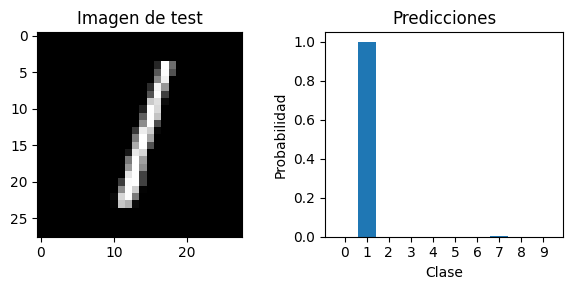

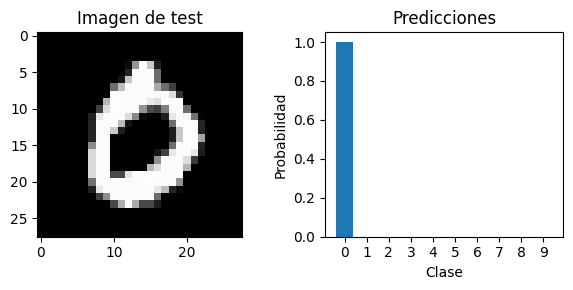

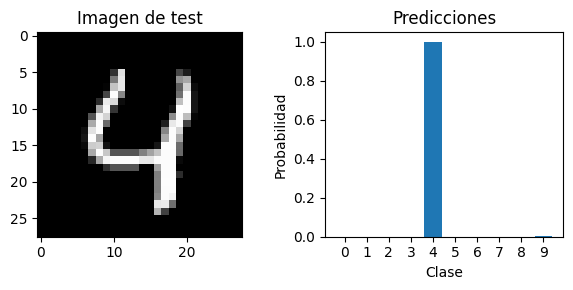

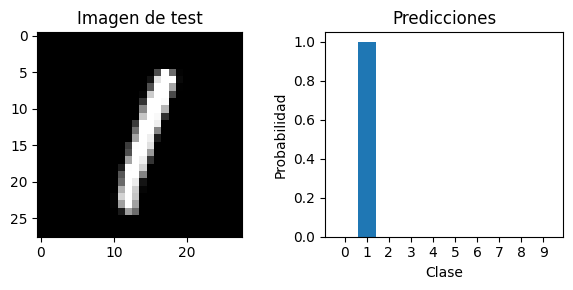

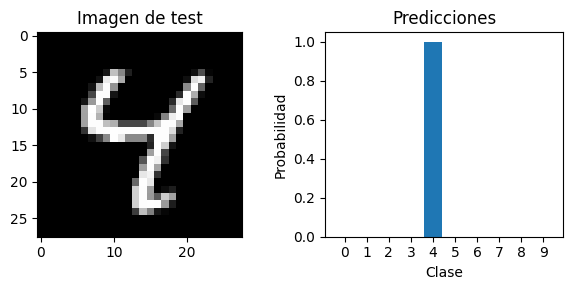

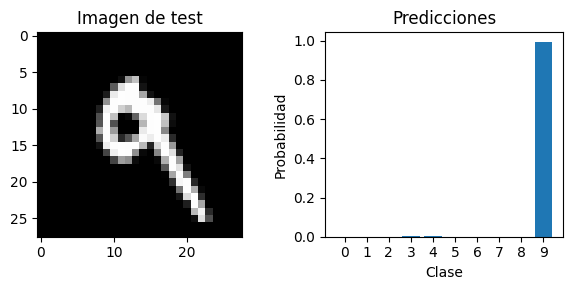

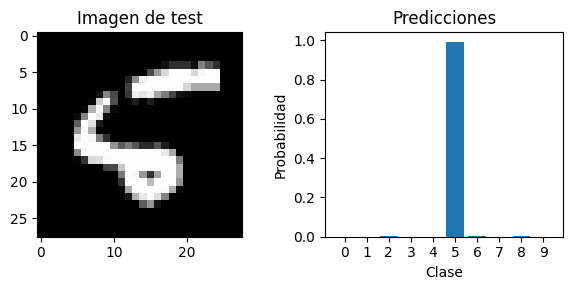

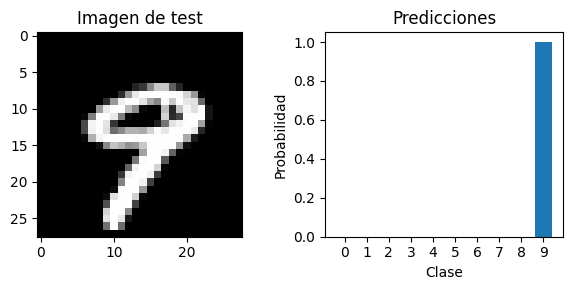

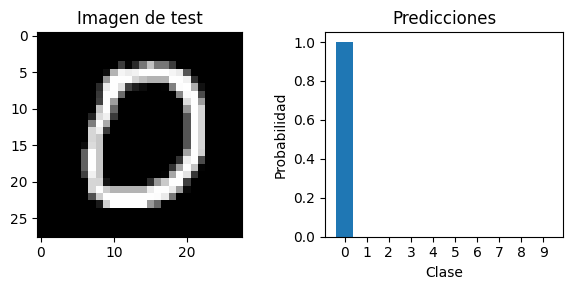

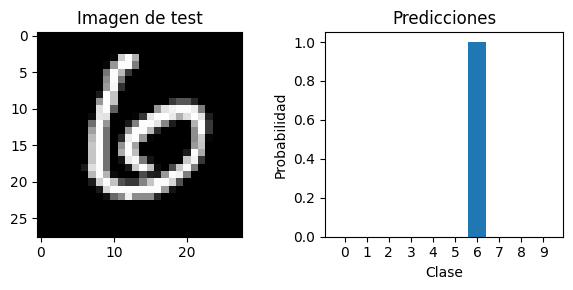

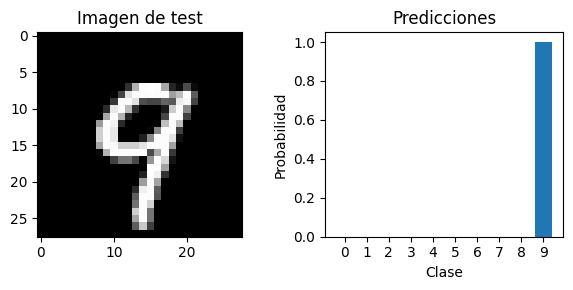

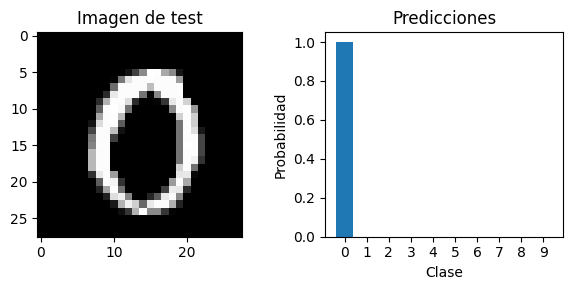

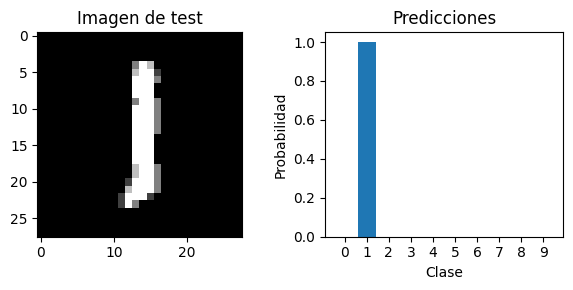

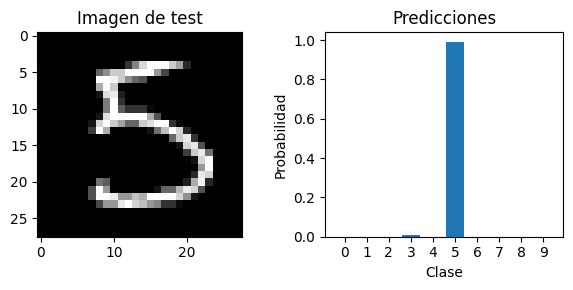

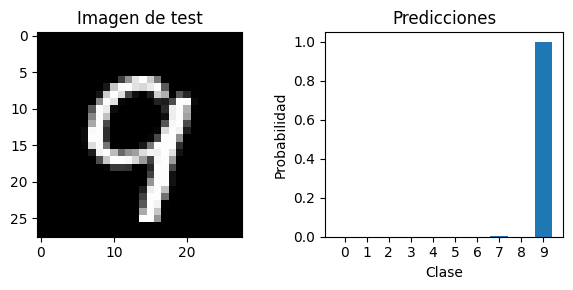

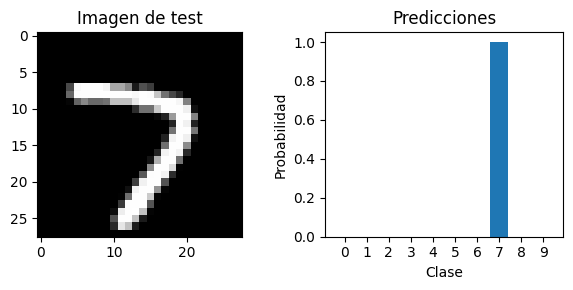

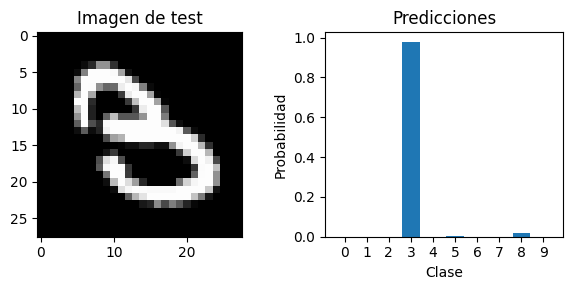

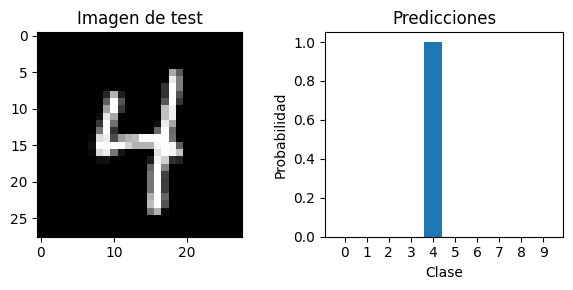

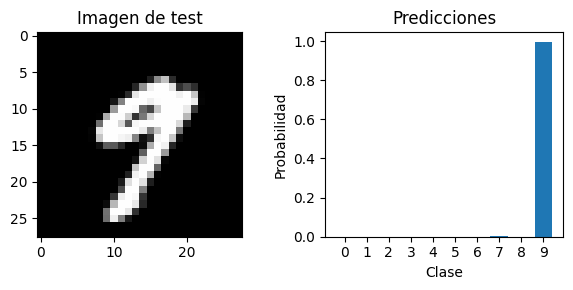

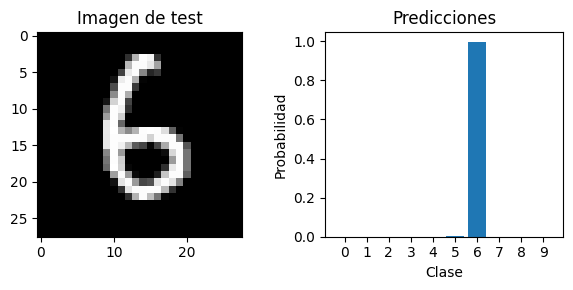

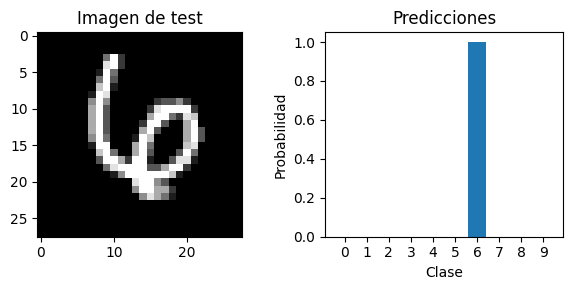

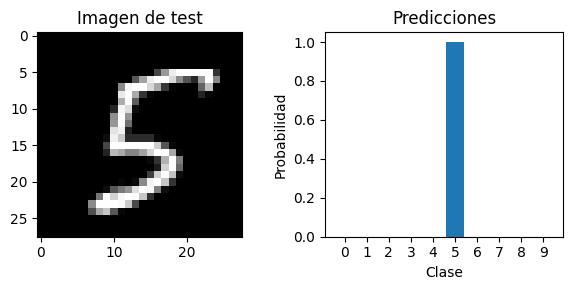

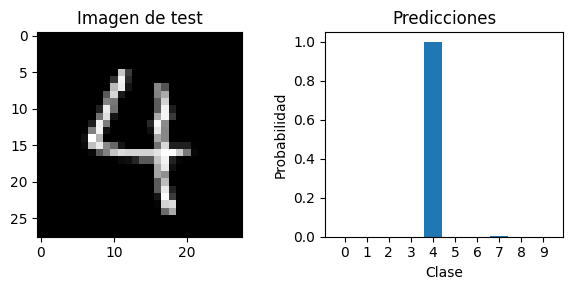

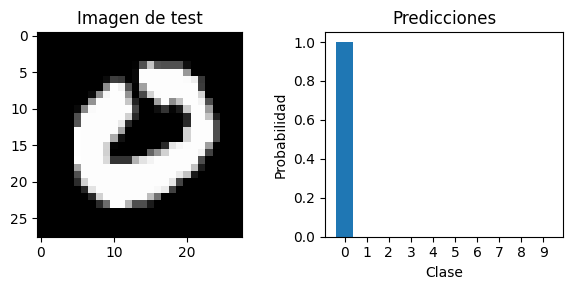

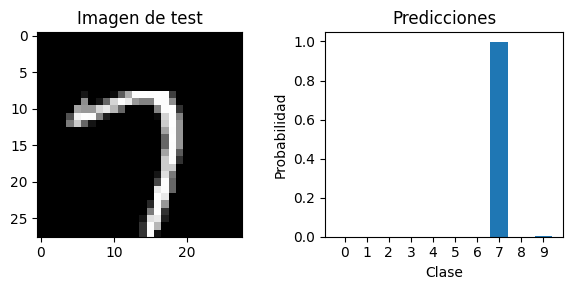

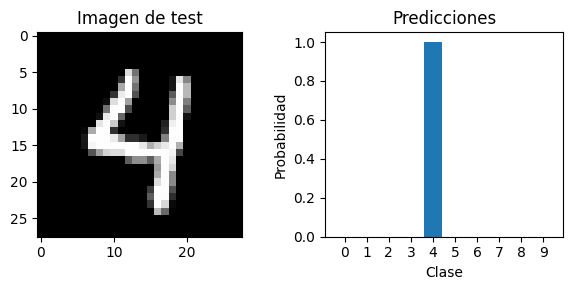

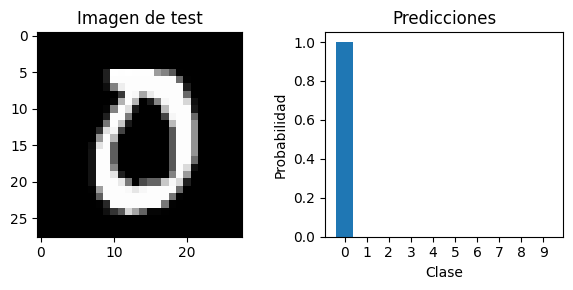

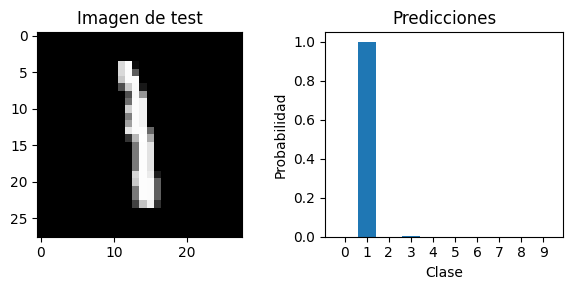

In [94]:
for i in range(0, 30):
  showResults(test_X[i], predictions[i])

In [110]:
import numpy as np
# sacar la posición del número mayor para saber cual es el número que predijo
def find_max_positions(array_of_arrays):
    return (np.argmax(array_of_arrays, axis=1)).tolist()

In [111]:
prediction_number = find_max_positions(predictions)
real_number = find_max_positions(test_y)

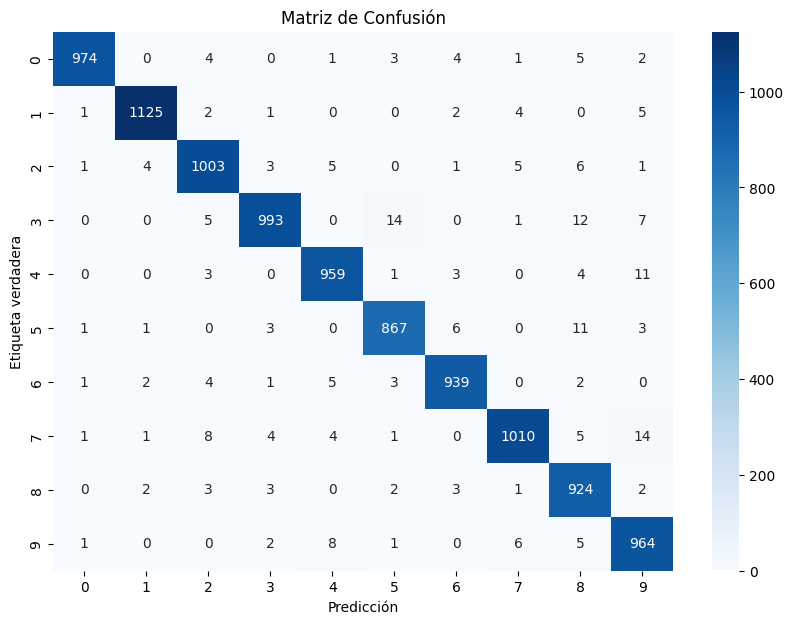

In [112]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de confusión
cm = confusion_matrix(prediction_number, real_number, labels=np.arange(10))

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()
